In [1]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load Dataset
#Load Dataset
dataset = pd.read_csv('./Seeds.csv')
dataset.head()

,Area,Perimeter,Compactness,LnthofKernl,WdthofKernl,Asymcoef,LnthofKernlGrv,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [3]:
#Key Statistics
dataset.describe()

,Area,Perimeter,Compactness,LnthofKernl,WdthofKernl,Asymcoef,LnthofKernlGrv,Type
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [4]:
#Tukey Method

# Import required libraries
from collections import Counter

# Outlier detection 
def detect_outliers(df,n,features):
    
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# List of Outliers
Outliers_to_drop = detect_outliers(dataset.drop('Type',axis=1),0,list(dataset.drop('Type',axis=1)))
dataset.drop('Type',axis=1).loc[Outliers_to_drop]

,Area,Perimeter,Compactness,LnthofKernl,WdthofKernl,Asymcoef,LnthofKernlGrv
157,12.13,13.73,0.8081,5.394,2.745,4.825,5.220
158,11.75,13.52,0.8082,5.444,2.678,4.378,5.310
174,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
203,12.70,13.41,0.8874,5.183,3.091,8.456,5.000
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056


In [5]:
#Create New Dataset without Outliers
good_data = dataset.drop(dataset.index[Outliers_to_drop]).reset_index(drop = True)
good_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area            205 non-null    float64
 1   Perimeter       205 non-null    float64
 2   Compactness     205 non-null    float64
 3   LnthofKernl     205 non-null    float64
 4   WdthofKernl     205 non-null    float64
 5   Asymcoef        205 non-null    float64
 6   LnthofKernlGrv  205 non-null    float64
 7   Type            205 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.9 KB


In [6]:
#Create Profile Report
 
#Importing package
import pandas_profiling as pp
from IPython.display import IFrame
 
# Profile Report
SeedsReport = pp.ProfileReport(good_data)
SeedsReport.to_file('FinalProject.html')
display(IFrame('FinalProject.html', width=900, height=350))

In [7]:
#Key Statistics
good_data.describe()

,Area,Perimeter,Compactness,LnthofKernl,WdthofKernl,Asymcoef,LnthofKernlGrv,Type
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,14.914000,14.586195,0.871745,5.636376,3.267902,3.638469,5.414263,1.975610
std,2.910524,1.309565,0.022620,0.445295,0.375662,1.441451,0.495527,0.813122
min,10.590000,12.410000,0.810700,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.360000,13.450000,0.857900,5.263000,2.956000,2.504000,5.045000,1.000000
50%,14.430000,14.390000,0.873500,5.541000,3.258000,3.586000,5.228000,2.000000
75%,17.360000,15.760000,0.887900,5.998000,3.563000,4.702000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,7.524000,6.550000,3.000000


In [8]:
#Create x and y variables
x = good_data.drop('Type', axis=1).to_numpy()
Y = good_data['Type'].to_numpy()

#Create Train and Test Dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size = 0.2,stratify=Y,random_state = 100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)



In [9]:
#Next Steps - Feature Selection using SelectFromModel
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(multi_class='multinomial',solver='newton-cg',                      
                         random_state=100,max_iter=1000)

clf.fit(x_train2,y_train)
model = SelectFromModel(clf, prefit=True)
feature_idx = model.get_support()
feature_name = good_data.drop('Type',axis=1).columns[feature_idx]
print('\nKey Features:',feature_name)


Key Features: Index(['Perimeter', 'LnthofKernl', 'LnthofKernlGrv'], dtype='object')


In [10]:
#Prepare for Models for Comparison

#Create x and y variables
x2 = good_data[['Perimeter', 'LnthofKernl', 'LnthofKernlGrv']].to_numpy()
Y2 = good_data['Type'].to_numpy()

#Create Train and Test Datasets (New Dataset)
from sklearn.model_selection import train_test_split
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,Y2,test_size = 0.2,stratify=Y2,random_state = 100)

#Fix the imbalanced Classes
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=100)
x_train_smt,y_train_smt = smt.fit_resample(x_train2,y_train2)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train3 = sc.fit_transform(x_train_smt)
x_test3 = sc.transform(x_test2)

x_2 = sc.transform(x2)


In [11]:
#Class Balance - Test Data
print('Train Data - Class Split')
num_ones = (y_train_smt == 1).sum()
num_twos = (y_train_smt == 2).sum()
num_threes = (y_train_smt == 3).sum()
print('Class 1 -',  num_ones)
print('Class 2 -',  num_twos)
print('Class 3 -',  num_threes)

Train Data - Class Split
Class 1 - 56
Class 2 - 56
Class 3 - 56


In [12]:
#Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Create Pipeline

pipeline =[]

pipe_logreg = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(multi_class='multinomial',solver='newton-cg',
                                               random_state=100,max_iter=1000))])
pipeline.insert(0,pipe_logreg)

# Set grid search params 

modelpara =[]

param_gridlogreg = {'clf__C': [0.01, 0.1, 1, 10, 100], 
                    'clf__penalty': ['l2'],
                   'clf__solver':['newton-cg', 'sag', 'saga' , 'lbfgs']}
modelpara.insert(0,param_gridlogreg)

Model Evaluation - Accuracy Score
Logistic Regression 0.96 +/- 0.04




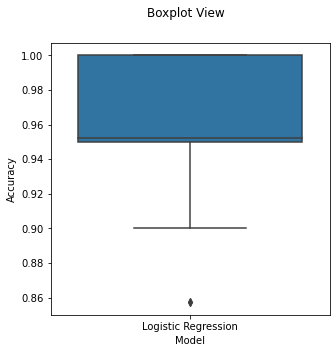

In [13]:
#Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(('Logistic Regression',pipe_logreg))

#Model Evaluation
results =[]
names=[]
scoring ='accuracy'
print('Model Evaluation - Accuracy Score')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x2,Y2,cv=rkf,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{} {:.2f} +/- {:.2f}'.format(name,cv_results.mean(),cv_results.std()))
print('\n')

fig = plt.figure(figsize=(5,5))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

In [14]:
#Define Gridsearch Function

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix  

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params, cv=cv2,scoring='accuracy')
    gs_clf = gs_clf.fit(x_train_smt, y_train_smt)
    model = gs_clf.best_estimator_
    
    # Use best model and test data for final evaluation
    y_pred = model.predict(x_test2)

    #Identify Best Parameters to Optimize the Model
    bestpara=str(gs_clf.best_params_)
    
    #Output Heading
    print('\nOptimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
        
    #Output Validation Statistics
    target_names=['1','2','3']
    print('\nBest Parameters:',bestpara)
    print('\n', confusion_matrix(y_test,y_pred))  
    print('\n',classification_report(y_test,y_pred,target_names=target_names))       


In [15]:
#Run Optimized LogisticRegression models

for pipeline, modelpara in zip(pipeline,modelpara):
    Gridsearch_cv(pipeline,modelpara)


Optimized Model

Model Name: LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=100,
                   solver='newton-cg')

Best Parameters: {'clf__C': 1, 'clf__penalty': 'l2', 'clf__solver': 'newton-cg'}

 [[12  1  1]
 [ 2 12  0]
 [ 1  0 12]]

               precision    recall  f1-score   support

           1       0.80      0.86      0.83        14
           2       0.92      0.86      0.89        14
           3       0.92      0.92      0.92        13

    accuracy                           0.88        41
   macro avg       0.88      0.88      0.88        41
weighted avg       0.88      0.88      0.88        41



In [16]:
#Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


#Create Pipeline

pipeline =[]

pipe_rdf = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(n_estimators=100,random_state=100))])
pipeline.insert(0,pipe_rdf)


# Set grid search params 

modelpara1 =[]

param_gridrdf = {
            'clf__n_estimators': [100,150,200],
            'clf__max_features': ['auto', 'log2', 'sqrt'],
            'clf__bootstrap': [True, False]}
modelpara1.insert(0,param_gridrdf)

Model Evaluation - Accuracy Score
Random Forest 0.93 +/- 0.06




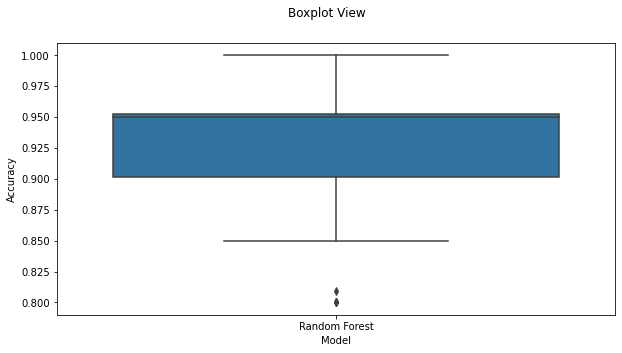

In [17]:
#Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(('Random Forest',pipe_rdf))

#Model Evaluation
results =[]
names=[]
scoring ='accuracy'
print('Model Evaluation - Accuracy Score')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x2,Y2,cv=rkf,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('{} {:.2f} +/- {:.2f}'.format(name,cv_results.mean(),cv_results.std()))
print('\n')

#Boxpot View
fig = plt.figure(figsize=(10,5))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

In [18]:
#Define Gridsearch Function

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix  

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params,cv=cv2)
    gs_clf = gs_clf.fit(x_train_smt, y_train_smt)
    model = gs_clf.best_estimator_
    
    
    # Use best model and test data for final evaluation
    y_pred = model.predict(x_test2)

    #Identify Best Parameters to Optimize the Model
    bestpara=str(gs_clf.best_params_)
    
    #Output Heading
    print('\nOptimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
    print('\n')
    
    #Feature Importance - optimized
    print('Feature Importances')
    for name, score in zip(list(good_data[['Perimeter', 'LnthofKernl', 'LnthofKernlGrv']]),
                           gs_clf.best_estimator_.named_steps['clf'].feature_importances_):
        print(name, round(score,2))
    
    #Output Validation Statistics
    target_names=['1','2','3']
    print('\nBest Parameters:',bestpara)
    print('\n', confusion_matrix(y_test,y_pred))  
    print('\n',classification_report(y_test,y_pred))     

In [19]:
#Run Models

for pipeline, modelpara1 in zip(pipeline,modelpara1):
    Gridsearch_cv(pipeline,modelpara1)


Optimized Model

Model Name: RandomForestClassifier(random_state=100)


Feature Importances
Perimeter 0.4
LnthofKernl 0.27
LnthofKernlGrv 0.33

Best Parameters: {'clf__bootstrap': True, 'clf__max_features': 'auto', 'clf__n_estimators': 100}

 [[13  1  0]
 [ 2 12  0]
 [ 2  0 11]]

               precision    recall  f1-score   support

           1       0.76      0.93      0.84        14
           2       0.92      0.86      0.89        14
           3       1.00      0.85      0.92        13

    accuracy                           0.88        41
   macro avg       0.90      0.88      0.88        41
weighted avg       0.89      0.88      0.88        41



In [22]:
#Define Plot for learning curve

from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train_smt, 
                                                            y=y_train_smt,
                                                            train_sizes= np.linspace(0.1, 1.0, 10),
                                                            cv=10,
                                                            scoring='accuracy',random_state=100)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.ylim([0.8, 1.01])
    plt.show()


Random Forest - Learning Curve


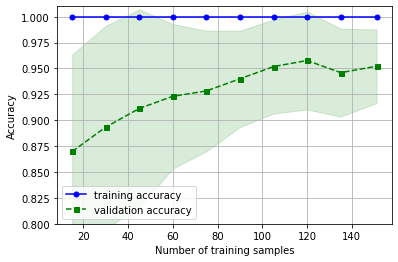

Mulit-Logisistic Regression - Learning Curve


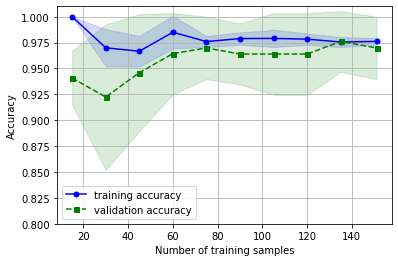

In [23]:
#Plot Learning Curve
print('\nRandom Forest - Learning Curve')
plot_learning_curves(pipe_rdf)
print('Mulit-Logisistic Regression - Learning Curve')
plot_learning_curves(pipe_logreg)

In [20]:
#Prepare Models 
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression

Model Evaluation - Recall Score
Logistic Regression 0.94 +/- 0.05
Random Forest 0.93 +/- 0.06
Bagging Classifier 0.93 +/- 0.05
AdaBoost 0.72 +/- 0.17
GBC 0.94 +/- 0.05




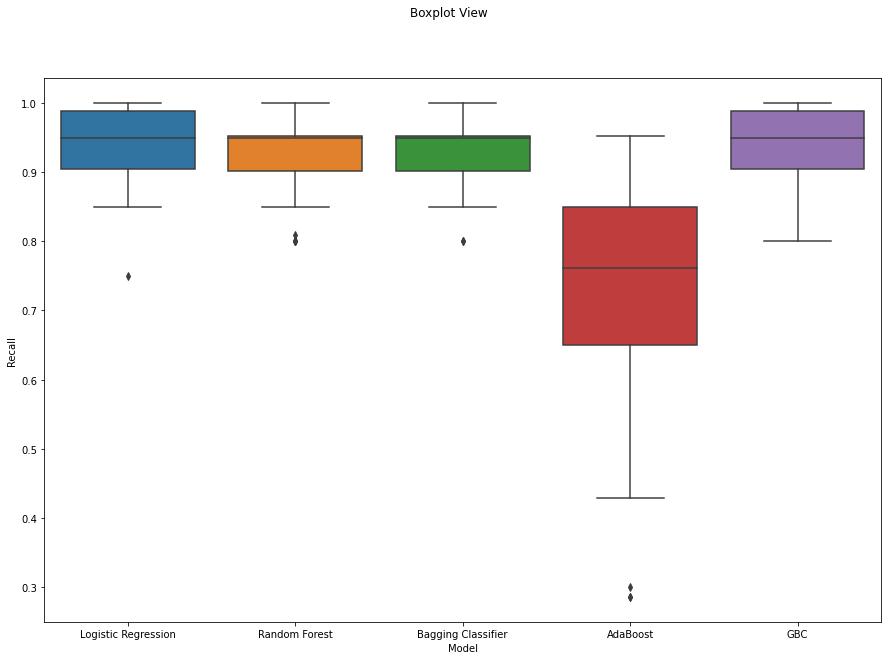

In [21]:
#Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(('Logistic Regression',LogisticRegression(multi_class='multinomial',solver='newton-cg',                  random_state=100,max_iter=1000)))
models.append(('Random Forest',RandomForestClassifier(n_estimators=100,
                                                      random_state=100)))
models.append(('Bagging Classifier',BaggingClassifier(random_state=100)))
models.append(('AdaBoost',AdaBoostClassifier(random_state=100)))
models.append(('GBC',GradientBoostingClassifier(random_state=100)))

#Model Evaluation
results =[]
names=[]
scoring ='recall_weighted'
print('Model Evaluation - Recall Score')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x2,Y2,cv=rkf,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{} {:.2f} +/- {:.2f}'.format(name,cv_results.mean(),cv_results.std()))
print('\n')

#Boxpot View
fig = plt.figure(figsize=(15,10))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('Recall')
plt.xlabel('Model')
plt.show()

In [24]:
#Create Voting Model - Sklearn
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate

estimators = []

#Identify Models
model1 = LogisticRegression(multi_class='multinomial',solver='newton-cg',
                                               random_state=100,max_iter=1000)
estimators.append(('Logistic Regression', model1))

model2= GradientBoostingClassifier(random_state=100)
estimators.append(('GBC', model2))

voting_clf=VotingClassifier(estimators,voting='soft')

scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro'}
print('\nVoting Model')
for clf in (model1,model2,voting_clf):
    rkfcv= clf.fit(x_train3,y_train_smt)
    ens_rkf1 = RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    rKFcv = cross_validate(rkfcv, x_2, Y2, scoring=scoring, cv=ens_rkf1)
    print(clf.__class__.__name__,round(rKFcv['test_rec_macro'].mean(),2))   


Voting Model
LogisticRegression 0.96
GradientBoostingClassifier 0.94
VotingClassifier 0.95
